**심장 질환의 개인 주요 지표를 데이터로 사용**

건강상태와 관련된 성인 40만 명을 대상으로 한 2020년 연간 CDC 조사 데이터

In [2]:
# 파일 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = '/content/drive/MyDrive/heart_2020_cleaned.csv'

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# **컬럼 정보**



*   HeartDisease
관상동맥심장질환(CHD) 또는 심근경색(MI)이 있다고 보고된 적이 있는 응답자
*   BMI
체질량 지수(BMI)


*   Smoking	
평생 최소 100개비 이상 피우셨나요? [주의: 5갑 = 100개비]

*   AlcoholDrinking
과음자(성인 남성은 주당 14잔 이상, 성인 여성은 주당 7잔 이상)

*   Stroke	
(말한 적 있음) (당신은) 뇌졸중이 있습니까?

*   PhysicalHealth
지금 귀하의 신체적 질병과 부상을 포함한 신체적 건강을 생각해보면, 지난 30일 동안 귀하의 신체 건강이 좋지 않았던 날은 며칠입니까? (0-30일)
*   MentalHealth
귀하의 정신건강을 생각해보면, 지난 30일 동안 귀하의 정신건강이 좋지 않은 날은 며칠입니까? (0-30일)


*   DiffWalking
걷거나 계단을 오르는데 심각한 어려움이 있습니까?	


*   Sex
당신은 남성 또는 여성이다?	


*   AgeCategory
( 14레벨 )연령 범주	



*   Race
전가된 인종/민족 가치	
*   Diabetic
당뇨병이 있습니까?


*   PhysicalActivity
지난 30일 동안 일상 업무 이외의 신체 활동이나 운동을 했다고 신고한 성인

*   GenHealth
일반적으로 당신의 건강은 어떠한가?

*   SleepTime
귀하는 24시간 중 평균 몇 시간의 수면을 취하십니까?	
*   Asthma
천식이 있습니까?


*   KidneyDisease
신장 결석, 방광 감염 또는 요실금을 제외하고 신장 질환이 있습니까?


*   SkinCancer
피부암이 있습니까?

In [5]:
# 타겟의 비율 _ 분류
df['HeartDisease'].value_counts(normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
# unique 확인
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
PhysicalActivity,319795,2,Yes,247957
Asthma,319795,2,No,276923
KidneyDisease,319795,2,No,308016
SkinCancer,319795,2,No,289976


In [9]:
# 이진변환_ 성별은 그대로 처리
data = df.replace({'Yes': 1, 'No': 0,'Yes (during pregnancy)': 1,'No, borderline diabetes': 0})
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [10]:
data.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Sex,319795,2,Female,167805
GenHealth,319795,5,Very good,113858
Race,319795,6,White,245212
AgeCategory,319795,13,65-69,34151


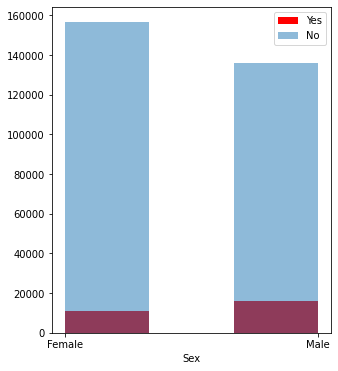

In [11]:
# 데이터 그래프_1
import matplotlib.pyplot as plt

# 성별 데이터 자르기
data_sex = data[['HeartDisease','Sex']]
# 그래프 크기
fig, ax = plt.subplots(figsize = (5,6))
# 막대 그래프
ax.hist(data_sex[data_sex['HeartDisease']==1]['Sex'], bins=3, color='red',label='Yes')
ax.hist(data_sex[data_sex['HeartDisease']==0]['Sex'], bins=3, alpha=0.5, label='No')
# 라벨 설정
ax.set_xlabel('Sex', fontsize = 10)
ax.legend();

표본수는 남성이 적지만, 심장질환을 앓고 있다고 답한 사람의 수가 여성보다 남성이 더 많은 것을 알수 있다.

In [12]:
# GenHealth_비율
data_Gen = data[['HeartDisease','GenHealth']]
# 각 비율
data_Gen_Fair = data_Gen[data_Gen['GenHealth']== 'Fair']
print(data_Gen_Fair.value_counts(normalize=True).round(2))
data_Gen_Poor = data_Gen[data_Gen['GenHealth']== 'Poor']
print(data_Gen_Poor.value_counts(normalize=True).round(2))
data_Gen_Good = data_Gen[data_Gen['GenHealth']== 'Good']
print(data_Gen_Good.value_counts(normalize=True).round(2))
data_Gen_Verygood = data_Gen[data_Gen['GenHealth']== 'Very good']
print(data_Gen_Verygood.value_counts(normalize=True).round(2))
data_Gen_Excellent = data_Gen[data_Gen['GenHealth']== 'Excellent']
print(data_Gen_Excellent.value_counts(normalize=True).round(2))

HeartDisease  GenHealth
0             Fair         0.8
1             Fair         0.2
dtype: float64
HeartDisease  GenHealth
0             Poor         0.66
1             Poor         0.34
dtype: float64
HeartDisease  GenHealth
0             Good         0.9
1             Good         0.1
dtype: float64
HeartDisease  GenHealth
0             Very good    0.95
1             Very good    0.05
dtype: float64
HeartDisease  GenHealth
0             Excellent    0.98
1             Excellent    0.02
dtype: float64


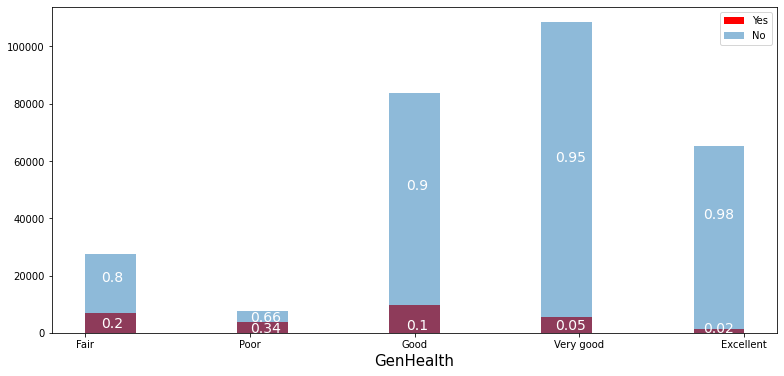

In [13]:
# 데이터 그래프_2
# 자가 건강상태 데이터 자르기
data_Gen = data[['HeartDisease','GenHealth']]
# 그래프 크기
fig, ax = plt.subplots(figsize = (13,6))
# 막대 그래프
ax.hist(data_Gen[data_Gen['HeartDisease']==1]['GenHealth'], bins=13, color='red',label='Yes')
ax.hist(data_Gen[data_Gen['HeartDisease']==0]['GenHealth'], bins=13, alpha=0.5, label='No')
# 텍스트 설정
font = {'color':  'White', 'size': 14}
# Fair
plt.text(0.1, 18000.0, '0.8', fontdict=font)
plt.text(0.1, 2000, '0.2', fontdict=font)
# Poor
plt.text(1.0, 4000.0, '0.66', fontdict=font)
plt.text(1.0, 1.0, '0.34', fontdict=font)
# Good
plt.text(1.95, 50000.0, '0.9', fontdict=font)
plt.text(1.95, 1000.0, '0.1', fontdict=font)
# Very good
plt.text(2.85, 60000.0, '0.95', fontdict=font)
plt.text(2.85, 1000.0, '0.05', fontdict=font)
# Excellent
plt.text(3.75, 40000.0, '0.98', fontdict=font)
plt.text(3.75, 1.0, '0.02', fontdict=font)
# 라벨 설정
ax.set_xlabel('GenHealth', fontsize = 15)
ax.legend();

평소 느끼는 건강의 상태를 그래프로 확인한 결과

의외로 'Good'이라고 답한 사람 중 심장질환을 앓고 있는 경우가 많고 생각 했으나, 

비율로 확인해본 결과
건강 상태를 안좋게 느낄수록 심장질환의 여부가 점차 늘어나는 것을 알 수 있다. 

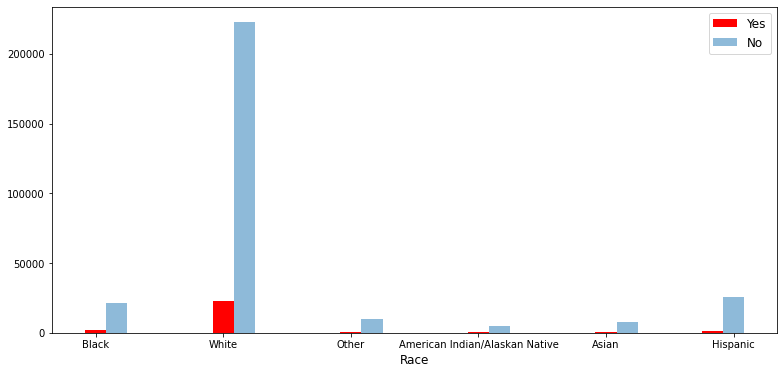

In [14]:
# 데이터 그래프_3
# 인종 데이터 자르기
data_Race = data[['HeartDisease','Race']]
# 그래프 크기
fig, ax = plt.subplots(figsize = (13,6))
# 막대 그래프
ax.hist(data_Race[data_Race['HeartDisease']==1]['Race'], bins=30, color='red',label='Yes',align='left')
ax.hist(data_Race[data_Race['HeartDisease']==0]['Race'], bins=30, alpha=0.5, label='No',align='right')
# 라벨 설정
ax.set_xlabel('Race', fontsize=12)          

ax.legend(['Yes', 'No'], fontsize=12) 

In [15]:
# Race_비율
data_Race = data[['HeartDisease','Race']]
# 각 비율
data_Race_Black = data_Race[data_Race['Race']== 'Black']
print(data_Race_Black.value_counts(normalize=True).round(2))
data_Race_White = data_Race[data_Race['Race']== 'White']
print(data_Race_White.value_counts(normalize=True).round(2))
data_Race_Asian = data_Race[data_Race['Race']== 'Asian']
print(data_Race_Asian.value_counts(normalize=True).round(2))
data_Race_American = data_Race[data_Race['Race']== 'American Indian/Alaskan Native']
print(data_Race_American.value_counts(normalize=True).round(2))
data_Race_Other = data_Race[data_Race['Race']== 'Other']
print(data_Race_Other.value_counts(normalize=True).round(2))
data_Race_Hispanic = data_Race[data_Race['Race']== 'Hispanic']
print(data_Race_Hispanic.value_counts(normalize=True).round(2))

HeartDisease  Race 
0             Black    0.92
1             Black    0.08
dtype: float64
HeartDisease  Race 
0             White    0.91
1             White    0.09
dtype: float64
HeartDisease  Race 
0             Asian    0.97
1             Asian    0.03
dtype: float64
HeartDisease  Race                          
0             American Indian/Alaskan Native    0.9
1             American Indian/Alaskan Native    0.1
dtype: float64
HeartDisease  Race 
0             Other    0.92
1             Other    0.08
dtype: float64
HeartDisease  Race    
0             Hispanic    0.95
1             Hispanic    0.05
dtype: float64


비율을 확인해본 결과 

백인이 심장질환을 앓고 있는 경우가 제일 많았다.

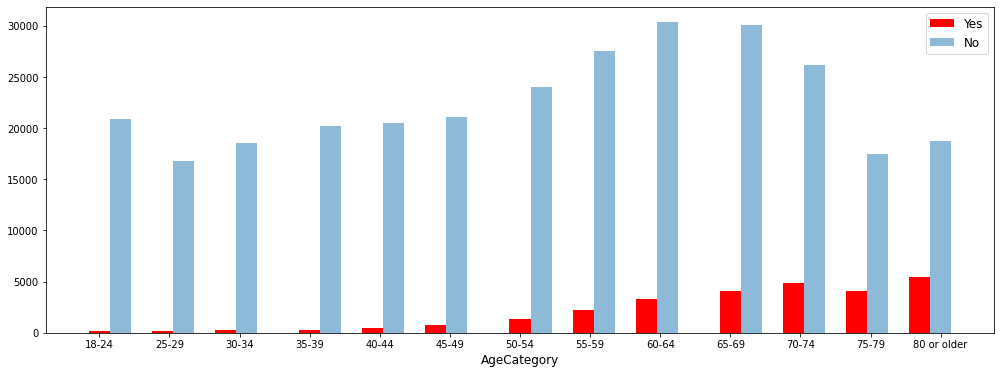

In [16]:
# 데이터 그래프_4
# 나이 데이터 자르기
data_Age = data[['HeartDisease','AgeCategory']].sort_values(by='AgeCategory')
# 그래프 크기
fig, ax = plt.subplots(figsize = (17,6))
# 막대 그래프
ax.hist(data_Age[data_Age['HeartDisease']==1]['AgeCategory'], bins=40, color='red',label='Yes',align='left')
ax.hist(data_Age[data_Age['HeartDisease']==0]['AgeCategory'], bins=40, alpha=0.5, label='No',align='right')
# 라벨 설정
ax.set_xlabel('AgeCategory', fontsize=12)

ax.legend(['Yes', 'No'], fontsize=12) 

나이가 많아 질수록 심장질환의 걸릴 가능성이 커지는것을 알 수 있다. 
그 중 50-65 사이에서 급격하게 증가한 것을 확인할수 있다.

In [ ]:
!pip install category_encoders

In [17]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split

features = data.drop(columns =['HeartDisease'], axis = 1)
target = data['HeartDisease']
# 데이터 나누기_ 훈련 - 테스트 (train , test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, train_size=0.8, random_state=2)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (255836, 17)
X_test shape:  (63959, 17)
y_train shape:  (255836,)
y_test shape:  (63959,)


In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# 파이프라인
pipe1 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


pipe1.fit(X_train, y_train)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = pipe1.predict(X_test)
print('검증 정확도: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

검증 정확도:  0.9058615675667224
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58530
           1       0.34      0.12      0.18      5429

    accuracy                           0.91     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.91      0.88     63959



In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
y_pred_proba = pipe1.predict_proba(X_test)[:, 1]
print('F1-score: ', f1_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

F1-score:  0.175318449527462


,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.970000
1,0.000017,0.000000,0.970000
2,0.000017,0.000368,0.950000
3,0.000051,0.000368,0.940000
4,0.000085,0.000368,0.930000
...,...,...,...
869,0.618418,0.923743,0.001667
870,0.618503,0.923927,0.001429
871,0.618572,0.923927,0.001250
872,0.618589,0.923927,0.001111


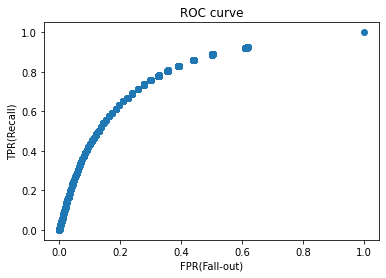

In [21]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [22]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score

0.7892778787294297

In [ ]:
!pip install eli5

In [24]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pipe2 = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', XGBClassifier(n_estimators=100
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2)) 
])
pipe2.named_steps

{'preprocessing': Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                 ('simpleimputer', SimpleImputer())]),
 'rf': XGBClassifier(learning_rate=0.2, max_depth=7, n_jobs=-1, random_state=2)}

In [25]:
pipe2.fit(X_train, y_train)
print('검증 정확도: ', pipe2.score(X_test, y_test))

y_pred = pipe2.predict(X_test)
print(classification_report(y_test, y_pred))

검증 정확도:  0.9152582122922497
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58530
           1       0.50      0.10      0.16      5429

    accuracy                           0.92     63959
   macro avg       0.71      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959



In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
y_pred_proba = pipe2.predict_proba(X_test)[:, 1]
print('F1-score: ', f1_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

F1-score:  0.1633220129669651


,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.950777
1,0.000017,0.000000,0.950777
2,0.000051,0.000000,0.927191
3,0.000051,0.000553,0.893137
4,0.000068,0.000553,0.890245
...,...,...,...
13169,0.999300,0.999816,0.001111
13170,0.999334,0.999816,0.001110
13171,0.999880,0.999816,0.000887
13172,0.999880,1.000000,0.000880


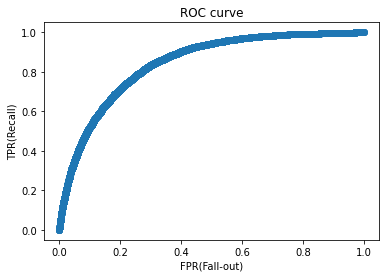

In [78]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

: